 Importing important Libraries/Dependencies

In [281]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler



Now adding Data Sets

In [282]:
titanic_dataset = pd.read_csv('/content/tested.csv')
titanic_dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [283]:
from sklearn.preprocessing import LabelEncoder
label_encoding= LabelEncoder()
titanic_dataset['Sex']=label_encoding.fit_transform(titanic_dataset['Sex'])

Printing top 5 rows of the dataset

In [284]:
titanic_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S


Inquiring about number of rows and columns

In [285]:
titanic_dataset.shape

(418, 12)

information about statical measures of thr dataset

In [286]:
titanic_dataset.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,0.636364,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,0.481622,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,0.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,1.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,1.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200


In [287]:
titanic_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    int64  
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 39.3+ KB


Finding the missing values in the given data

In [288]:
titanic_dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

we can see the missing values in the given dataset in : Age, Fare, Cabin

In [289]:
#Handling the Missing Value
# In the Age column
#Replacing all the missing values in Age column with the mean values
titanic_dataset['Age'].fillna(titanic_dataset['Age'].mean(),inplace=True)


In [290]:
#Repalcing all the missing values in "fare" clumn with mean value
titanic_dataset['Fare'].fillna(titanic_dataset['Fare'].mean(),inplace=True)

In [291]:
#With the "Embraked" column , the missing values will be change by mode value
titanic_dataset['Embarked'].fillna(titanic_dataset['Embarked'].mode()[0],inplace=True)


In [292]:
#For the column cabin , it has a lot of missing values do we will be dropping that column
titanic_dataset=titanic_dataset.drop(columns='Cabin',axis=1)

Rechecking fpor missing values in the dataset now

In [293]:
titanic_dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Now you will do some data analysis

In [294]:
titanic_dataset.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,0.636364,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,0.481622,12.634534,0.896760,0.981429,55.840500
min,892.000000,0.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,0.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,1.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,1.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200


In [295]:
#Finding the exact value of how many people survived
titanic_dataset['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

In [296]:
#finding the exact value of "Sex" cloumn
titanic_dataset['Sex'].value_counts()

1    266
0    152
Name: Sex, dtype: int64

Now move to data visualization

In [297]:
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

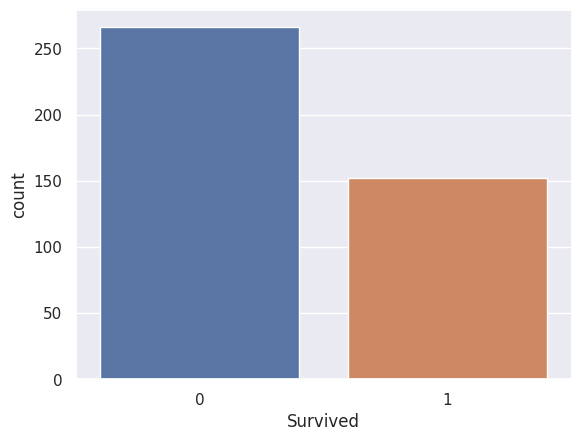

In [298]:
#A count plot for Survived Column
sns.countplot(x='Survived', data=titanic_dataset)

<Axes: xlabel='Sex', ylabel='count'>

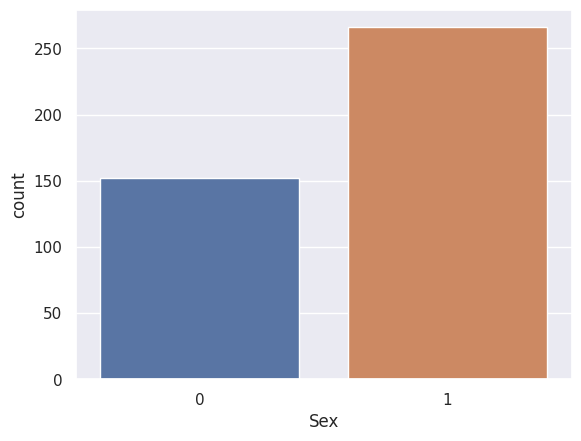

In [299]:
#A count plot for column "Sex"
sns.countplot(x='Sex', data=titanic_dataset)

<Axes: xlabel='Sex', ylabel='count'>

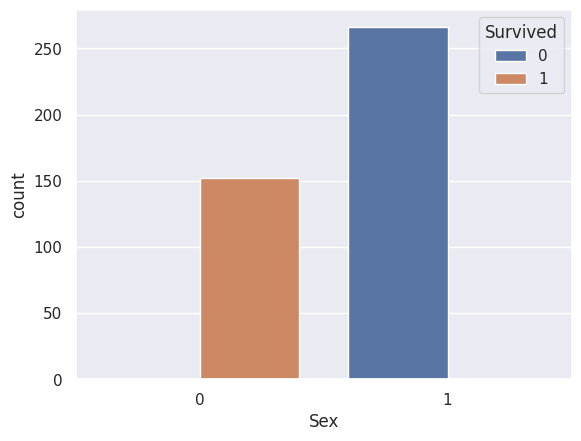

In [300]:
#now a count plot gender wise of people who survived
sns.countplot(x='Sex', hue='Survived', data=titanic_dataset)

<Axes: xlabel='Pclass', ylabel='count'>

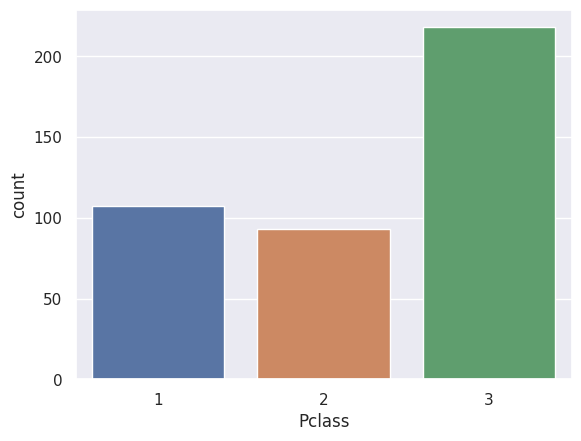

In [301]:
sns.countplot(x='Pclass', data=titanic_dataset)

<Axes: xlabel='Pclass', ylabel='count'>

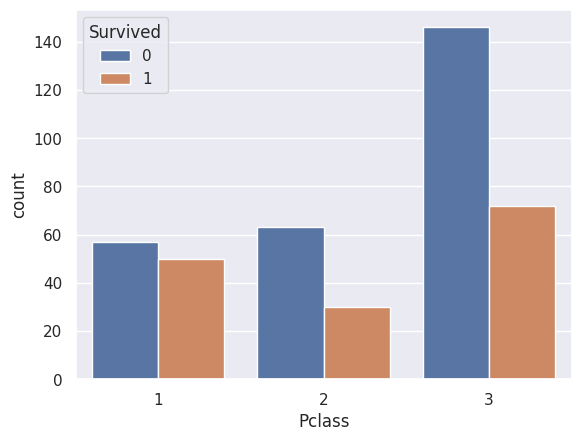

In [302]:
#now making a countplot of "Pclass" with "Survived"
sns.countplot(x='Pclass', hue='Survived', data=titanic_dataset)

Now you will move to encoding the categorial columns

In [303]:
titanic_dataset['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [304]:
titanic_dataset['Sex'].value_counts()

1    266
0    152
Name: Sex, dtype: int64

In [305]:
titanic_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,S


Features and Target

In [306]:
X= titanic_dataset.drop(columns= ['PassengerId', 'Name', 'Ticket', 'Survived','Embarked'],axis=1)
Y= titanic_dataset['Survived']

In [307]:
print(X)

     Pclass  Sex       Age  SibSp  Parch      Fare
0         3    1  34.50000      0      0    7.8292
1         3    0  47.00000      1      0    7.0000
2         2    1  62.00000      0      0    9.6875
3         3    1  27.00000      0      0    8.6625
4         3    0  22.00000      1      1   12.2875
..      ...  ...       ...    ...    ...       ...
413       3    1  30.27259      0      0    8.0500
414       1    0  39.00000      0      0  108.9000
415       3    1  38.50000      0      0    7.2500
416       3    1  30.27259      0      0    8.0500
417       3    1  30.27259      1      1   22.3583

[418 rows x 6 columns]


In [308]:
print(X)

     Pclass  Sex       Age  SibSp  Parch      Fare
0         3    1  34.50000      0      0    7.8292
1         3    0  47.00000      1      0    7.0000
2         2    1  62.00000      0      0    9.6875
3         3    1  27.00000      0      0    8.6625
4         3    0  22.00000      1      1   12.2875
..      ...  ...       ...    ...    ...       ...
413       3    1  30.27259      0      0    8.0500
414       1    0  39.00000      0      0  108.9000
415       3    1  38.50000      0      0    7.2500
416       3    1  30.27259      0      0    8.0500
417       3    1  30.27259      1      1   22.3583

[418 rows x 6 columns]


In [309]:
#Data splitting into traning and testing dataset
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=2)

In [310]:
print(X.shape, X_train.shape, X_test.shape)

(418, 6) (292, 6) (126, 6)


Now you will train model using "Logistic Regresssion"

In [311]:
model= LogisticRegression()

In [312]:
model.fit(X_train, Y_train)
LogisticRegression()

LogisticRegression()

Model Evaluation

In [313]:
X_train_prediction = model.predict(X_train)

In [314]:
print(X_train_prediction)

[0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 0 0
 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 1 1
 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1 1 0 1 0 0
 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0
 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 1 1
 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1
 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 1 1]


In [315]:
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy of training data : ', training_data_accuracy)

Accuracy of training data :  1.0


In [316]:
X_test_prediction = model.predict(X_test)

In [317]:
print(X_test_prediction)

[0 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0
 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0]


In [318]:
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy of test data : ', test_data_accuracy)

Accuracy of test data :  1.0
